# Tu-mejor-portatil-Vitoria

Nuestro jefe estaba buscando un@s maquinas para obtener datos de la competencia y poder aplicarle los conocimientos obtenidos para asignar precios a nuestra tienda de "Cositas-Markt". Lamentablemente se habían ido de vacaciones y nos lo ha pedido a nosotr@s … 💥🪓🔪

Nos toca arremangarnos y aplicar los conocimientos obtenidos en ML para obtener un modelo de predicción de precios de portátiles en función de sus marcas y prestaciones para poder lanzarlos a un precio competitivo al mercado.

Para ello contamos con un dataset con los siguientes campos:

1 Company- String -Laptop Manufacturer 2 Product -String -Brand and Model 3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.) 4 Inches -Numeric- Screen Size 5 ScreenResolution -String- Screen Resolution 6 Cpu- String -Central Processing Unit (CPU) 7 Ram -String- Laptop RAM 8 Memory -String- Hard Disk / SSD Memory 9 GPU -String- Graphics Processing Units (GPU) 10 OpSys -String- Operating System 11 Weight -String- Laptop Weight 12 Price_euros -Numeric- Price (Euro)

## Get the Data

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn import metrics

# 1. Exploratory Data Analysis

In [95]:
df = pd.read_csv("data/train.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [97]:
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [98]:
def limpiar_ram(x):
    return int(x.replace("GB",""))

def limpiar_peso(x):
    return float(x.replace("kg","").strip())

def limpiar_resolucion(x):
    # nos quedamos solo con la última parte (la que contiene 1920x1080)
    ultima = x.split()[-1]  
    w, h = ultima.split("x")
    return int(w), int(h)

def limpiar_memoria(x):
    # método MUY simple: solo toma la primera parte
    # "256GB SSD + 1TB HDD" → 256
    part = x.split()[0]
    if "TB" in part:
        return float(part.replace("TB","")) * 1024
    return float(part.replace("GB",""))


In [99]:
df["Ram_gb"] = df["Ram"].apply(limpiar_ram)
df["Weight_kg"] = df["Weight"].apply(limpiar_peso)

df[["res_x","res_y"]] = df["ScreenResolution"].apply(
    lambda x: pd.Series(limpiar_resolucion(x))
)

df["mem_total_gb"] = df["Memory"].apply(limpiar_memoria)

# 2. Prepare Data for Logistic Regression


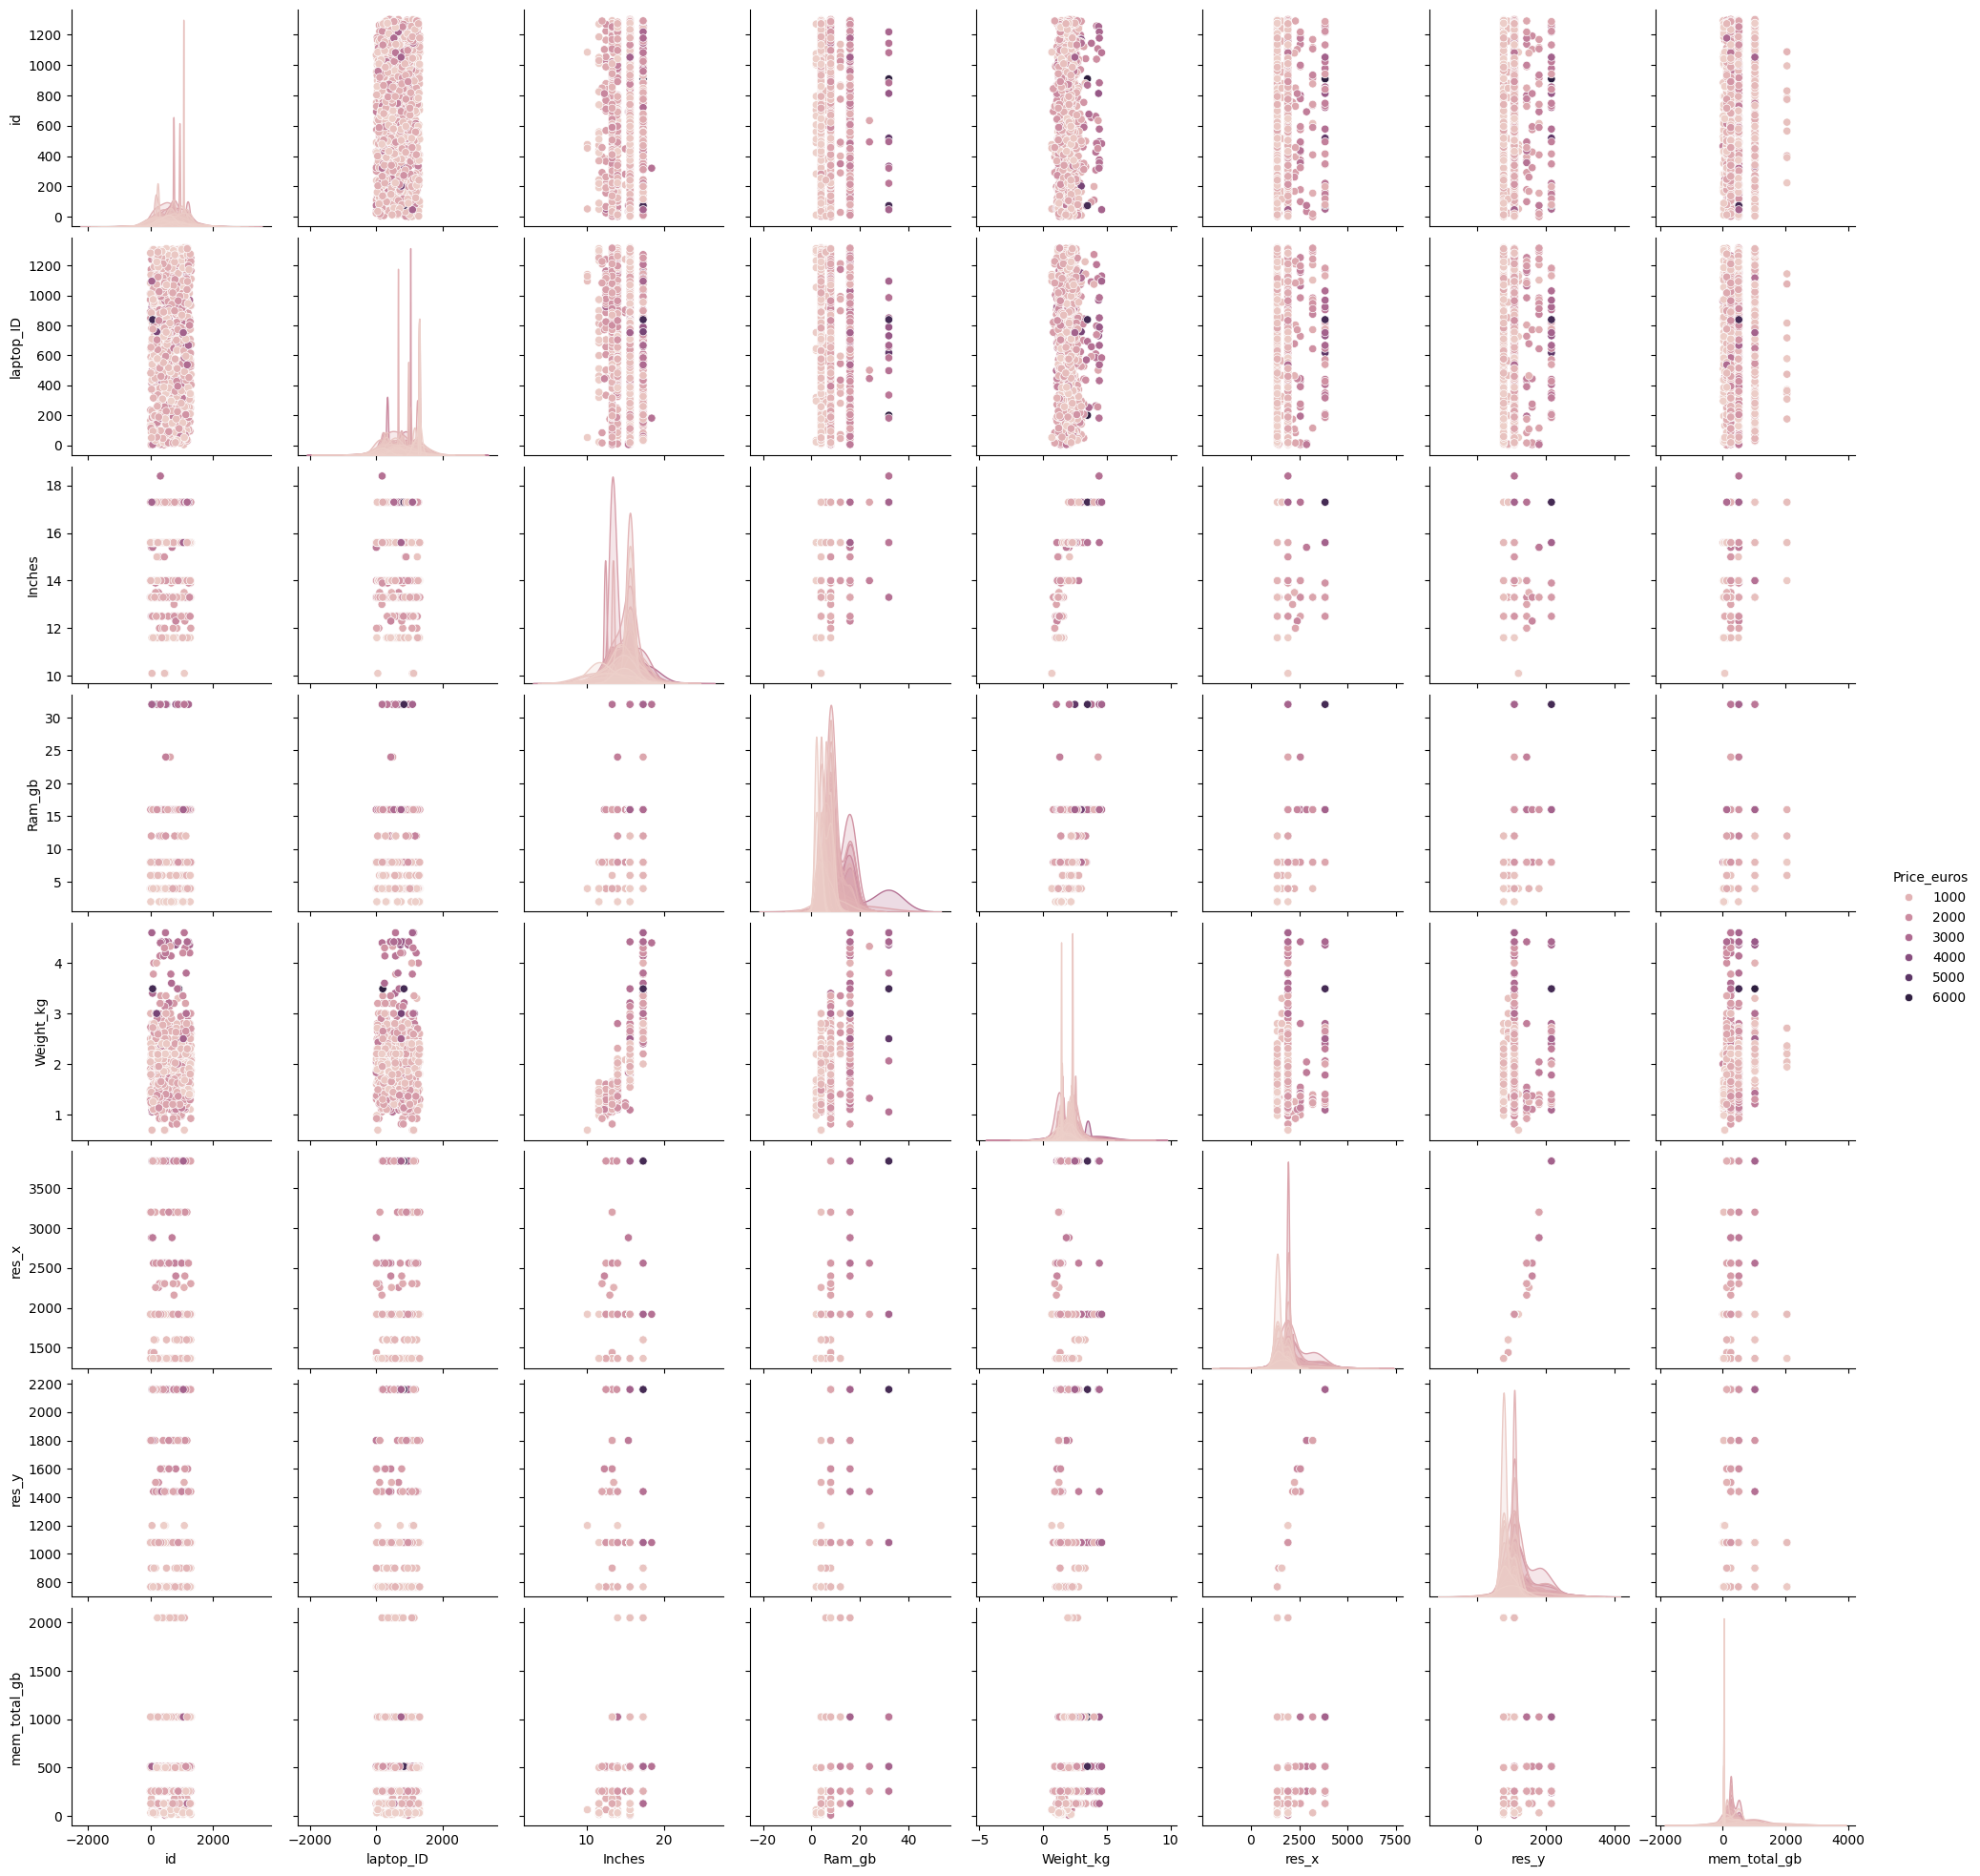

In [100]:
sns.pairplot(df, hue="Price_euros")

In [101]:
df.describe()

,id,laptop_ID,Inches,Price_euros,Ram_gb,Weight_kg,res_x,res_y,mem_total_gb
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873,8.188596,2.032112,1890.050439,1067.899123,442.837719
std,380.313813,384.873846,1.411744,714.597741,4.899827,0.653772,506.007321,290.338307,363.345112
min,0.000000,1.000000,10.100000,174.000000,2.000000,0.690000,1366.000000,768.000000,8.000000
25%,319.750000,330.500000,14.000000,589.000000,4.000000,1.500000,1366.000000,768.000000,256.000000
50%,636.500000,673.500000,15.600000,949.000000,8.000000,2.040000,1920.000000,1080.000000,256.000000
75%,980.250000,998.500000,15.600000,1458.500000,8.000000,2.300000,1920.000000,1080.000000,512.000000
max,1302.000000,1320.000000,18.400000,6099.000000,32.000000,4.600000,3840.000000,2160.000000,2048.000000


In [102]:
df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Ram_gb', 'Weight_kg', 'res_x', 'res_y', 'mem_total_gb'],
      dtype='object')

In [103]:
sns.heatmap(df_val_reg.corr(), annot= True, cmap="coldwarm", vmin=-1)

NameError: name 'df_val_reg' is not defined


#### 2. Train test split


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["Company", "TypeName"]
encoder = OrdinalEncoder()

df[cat_cols] = encoder.fit_transform(df[cat_cols])

df[cat_cols]

,Company,TypeName
0,4.0,3.0
1,2.0,3.0
2,16.0,3.0
3,4.0,1.0
4,4.0,4.0
...,...,...
907,0.0,0.0
908,16.0,3.0
909,0.0,3.0
910,4.0,4.0


In [ ]:
features = ["Company","TypeName","Inches","res_x","res_y","Ram_gb","Weight_kg","mem_total_gb"]

X = df[features]
y = df["Price_euros"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(729, 8)
(729,)
(183, 8)
(183,)



#### 3. StandardScaler()


In [ ]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(X_train)

X_train_st = st.transform(X_train)
X_test_st = st.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_st, y_train)

pred = lm.predict(X_test_st)
print(pred)

[1650.47037753  530.46117485 1142.02492104  497.18776441 1312.53818909
  484.77439106  525.12402426  914.56474299 1042.03557651 1148.19247692
 1040.30264947  489.83421085  942.8735846  1083.02802339  657.35124619
 1243.04498567 1923.44386847 1141.70296613  937.29415306  393.44869145
 1961.00497338 1169.46418494 1306.00957156 1094.85008099 1187.53722809
 1036.06669869 2155.24293357 1816.8622725  1745.03565985  407.7885187
 1102.55589009  634.90327163  859.95875258 1059.96641079  393.44869145
 2510.82771249 1807.68234373  664.77791175 1119.90831889 2563.7833201
  496.46973734  512.52832285 1249.2064986  1221.23231134  575.16345723
  830.55292588 1222.43366334  742.60047123 1299.30484693 1859.00793827
 1304.7212935  1020.68396475  513.45404558  560.9735924  1194.12780754
  992.78310264  557.97554696 1104.53776428  807.74791163 1075.05862064
 1227.01231944  893.26627059 1168.60404332  431.12847607 1913.26259608
  473.10441238  487.16436227 1083.39966061 1154.81891953 1216.21560932
 1190.01

In [ ]:
print("MAE:", mean_absolute_error(y_test, pred))
print("MAPE:", mean_absolute_percentage_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

MAE: 317.85404569580334
MAPE: 0.3166659857881034
MSE: 195802.44583363205
RMSE: 442.4957014860507


In [ ]:
# Cargo el dataset Test
df_test = pd.read_csv("data/test.csv")
df_test.head

<bound method NDFrame.head of        id  laptop_ID Company                                Product  \
0     181       1098      HP                           Spectre x360   
1     708        330    Acer                               Aspire 5   
2     862       1260    Acer                         Aspire ES1-572   
3    1064       1137      HP                         EliteBook 1040   
4     702       1015      HP                                 ENVY -   
..    ...        ...     ...                                    ...   
386  1281        145  Lenovo                     Legion Y520-15IKBN   
387   524       1195  Lenovo                     IdeaPad Y700-15ISK   
388  1015       1070      HP                                 250 G5   
389  1236        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
390  1036        258  Lenovo                         Yoga 920-13IKB   

               TypeName  Inches                           ScreenResolution  \
0             Ultrabook    13.3        

In [ ]:
df_test.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [ ]:
df_test = pd.read_csv("data/test.csv")
df_test.head

<bound method NDFrame.head of      Unnamed: 0  Price_euros      id  laptop_ID Company         Product  \
0             0       749.00   181.0     1098.0      HP    Spectre x360   
1             1       449.00   708.0      330.0    Acer        Aspire 5   
2             2      1460.00   862.0     1260.0    Acer  Aspire ES1-572   
3             3      2868.99  1064.0     1137.0      HP  EliteBook 1040   
4             4      1713.37   702.0     1015.0      HP          ENVY -   
..          ...          ...     ...        ...     ...             ...   
907         907       389.00     NaN        NaN     NaN             NaN   
908         908      1195.00     NaN        NaN     NaN             NaN   
909         909       449.00     NaN        NaN     NaN             NaN   
910         910      1775.00     NaN        NaN     NaN             NaN   
911         911       805.99     NaN        NaN     NaN             NaN   

      TypeName  Inches                 ScreenResolution  \
0    Ultra

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        912 non-null    int64  
 1   Price_euros       912 non-null    float64
 2   id                391 non-null    float64
 3   laptop_ID         391 non-null    float64
 4   Company           391 non-null    object 
 5   Product           391 non-null    object 
 6   TypeName          391 non-null    object 
 7   Inches            391 non-null    float64
 8   ScreenResolution  391 non-null    object 
 9   Cpu               391 non-null    object 
 10  Ram               391 non-null    object 
 11  Memory            391 non-null    object 
 12  Gpu               391 non-null    object 
 13  OpSys             391 non-null    object 
 14  Weight            391 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 107.0+ KB


In [93]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# X = todas las columnas excepto precio
X = df.drop("Price_euros", axis=1)

# y = precio
y = df["Price_euros"]

# columnas categóricas (las que son texto)
cat_cols = X.select_dtypes(include="object").columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    verbose=0
)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
test = pd.read_csv("test.csv")
pred = model.predict(test)
test["Predicted_Price"] = pred

In [70]:


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("Accuracy;", accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [71]:
# Itera 1000 veces todos los registros del DataFrame
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Max_iter es el parámetro que nos permite aumentar el número de iteraciones.

- Menos iteraciones, tarda menos pero se ajusta menos y la calidad de las predicciones puede bajar.

- Más iteraciones, tarda más. Puede sobre ajustar el modelo.

In [27]:
# Predicción con el modelo de regresión logística entrenado
pred = model.predict(X)
print(pred)

NameError: name 'X' is not defined

Predict_proba() nos devuelve las probabilidad de pertenecer a cada clase.

In [28]:
# Predict_proba() -->  Indica la probabilidad de acierto de la target de cada muestra que ha predecido
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

NameError: name 'X' is not defined

In [29]:
# Fiabilidad del funcionamiento del modelo
model.score(X, y)

NameError: name 'X' is not defined

In [30]:
# Indica la acción de click-ar SI/NO
model.classes_

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

# 4. Evaluation


#### 0. Accuracy

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("Accuracy;", accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

NameError: name 'X_train' is not defined


#### 1. Confusion Matrix


In [31]:
c_matrix = confusion_matrix(y_test, pred)

c_matrix

NameError: name 'y_test' is not defined

In [33]:
sns.heatmap(c_matrix, annot=True);

NameError: name 'c_matrix' is not defined


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [34]:
precision = precision_score(y_test, pred)
print("Precision:", pred)

NameError: name 'y_test' is not defined



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [35]:
recall = recall_score(y_test, pred)
print("Recall:", recall)

NameError: name 'y_test' is not defined



#### 4. F1 Score


2 * p * r / (r + p)

In [36]:
f1 = f1_score(y_test, pred)
print("F1-score:", f1)

NameError: name 'y_test' is not defined



#### 5. ROC curve

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--")  # Línea aleatoria
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

NameError: name 'roc_curve' is not defined



#### 6. P-R curve

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

NameError: name 'y_test' is not defined

In [39]:
print(classification_report(y_test, pred))

NameError: name 'y_test' is not defined